In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import pymysql
from sklearn.preprocessing import LabelEncoder

# 取得SQL資料

In [26]:
def get_data(table):
    config = {"host" : "airiot.tibame.cloud", "port" : 3306, "user" : "yi",
          "passwd" : "yi", "db" : "disease", "charset" : "utf8mb4"}

    conn = pymysql.connect(**config) ## **會將字典型態轉變(kwargs)
    cursor = conn.cursor()
    
    SQL = "select * from {}".format(table)
    print('資料筆數 :',cursor.execute(SQL))
    
    results = cursor.fetchall()
    data = pd.DataFrame(results, columns = ["ID", "type", "year", "age", "county", "week", "case"])
    data = data.drop("ID", axis=1) # 刪除columns 
    
    # 關閉連線
    cursor.close()
    conn.close()
    
    return data

In [27]:
df = get_data("influenza")
df.head()

資料筆數 : 510


,type,year,age,county,week,case
0,住院,2021,0-4,桃園市,1,24
1,住院,2021,15-24,桃園市,1,4
2,住院,2021,25-64,桃園市,1,33
3,住院,2021,5-14,桃園市,1,13
4,住院,2021,65+,桃園市,1,86


## LabelEncoder
> 1. 0 ~ 4 歲：0
> 2. 15 ~ 24 歲：1
> 3. 25 ~ 64 歲：2
> 4. 5 ~ 14 歲：3
> 5. 65 歲以上：4

In [28]:
df["new_age"] = LabelEncoder().fit_transform(df['age'])
df.head(10)

,type,year,age,county,week,case,new_age
0,住院,2021,0-4,桃園市,1,24,0
1,住院,2021,15-24,桃園市,1,4,1
2,住院,2021,25-64,桃園市,1,33,2
3,住院,2021,5-14,桃園市,1,13,3
4,住院,2021,65+,桃園市,1,86,4
5,門診,2021,0-4,桃園市,1,501,0
6,門診,2021,15-24,桃園市,1,124,1
7,門診,2021,25-64,桃園市,1,706,2
8,門診,2021,5-14,桃園市,1,507,3
9,門診,2021,65+,桃園市,1,316,4


In [29]:
df1 = df.groupby(["year","week", "new_age"], as_index=False).sum()
df1.week = df1.week.astype(int)
df1["new_age"] = df1["new_age"].astype(str)
df1.sort_values(by = ["year","week"])

,year,week,new_age,case
0,2021,1,0,525
1,2021,1,1,128
2,2021,1,2,739
3,2021,1,3,520
4,2021,1,4,402
...,...,...,...,...
250,2021,51,0,156
251,2021,51,1,88
252,2021,51,2,486
253,2021,51,3,103


In [30]:
df1.year

0      2021
1      2021
2      2021
3      2021
4      2021
       ... 
250    2021
251    2021
252    2021
253    2021
254    2021
Name: year, Length: 255, dtype: int64

In [31]:
df2 = df1[df1.year == 2021].set_index("week").sort_index()
df2

,year,new_age,case
week,,,
1,2021,0,525
1,2021,1,128
1,2021,2,739
1,2021,3,520
1,2021,4,402
...,...,...,...
51,2021,0,156
51,2021,1,88
51,2021,2,486


In [32]:
age_0_4 = df2[df2["new_age"] == "0"]
age_15_24 = df2[df2["new_age"] == "1"]
age_25_64 = df2[df2["new_age"] == "2"]
age_5_14 = df2[df2["new_age"] == "3"]
age_65 = df2[df2["new_age"] == "4"]

/Users/y/opt/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 27969 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/y/opt/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 34892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/y/opt/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24615 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/y/opt/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24863 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/y/opt/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20882 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/y/opt/anaconda3/envs/py36/li

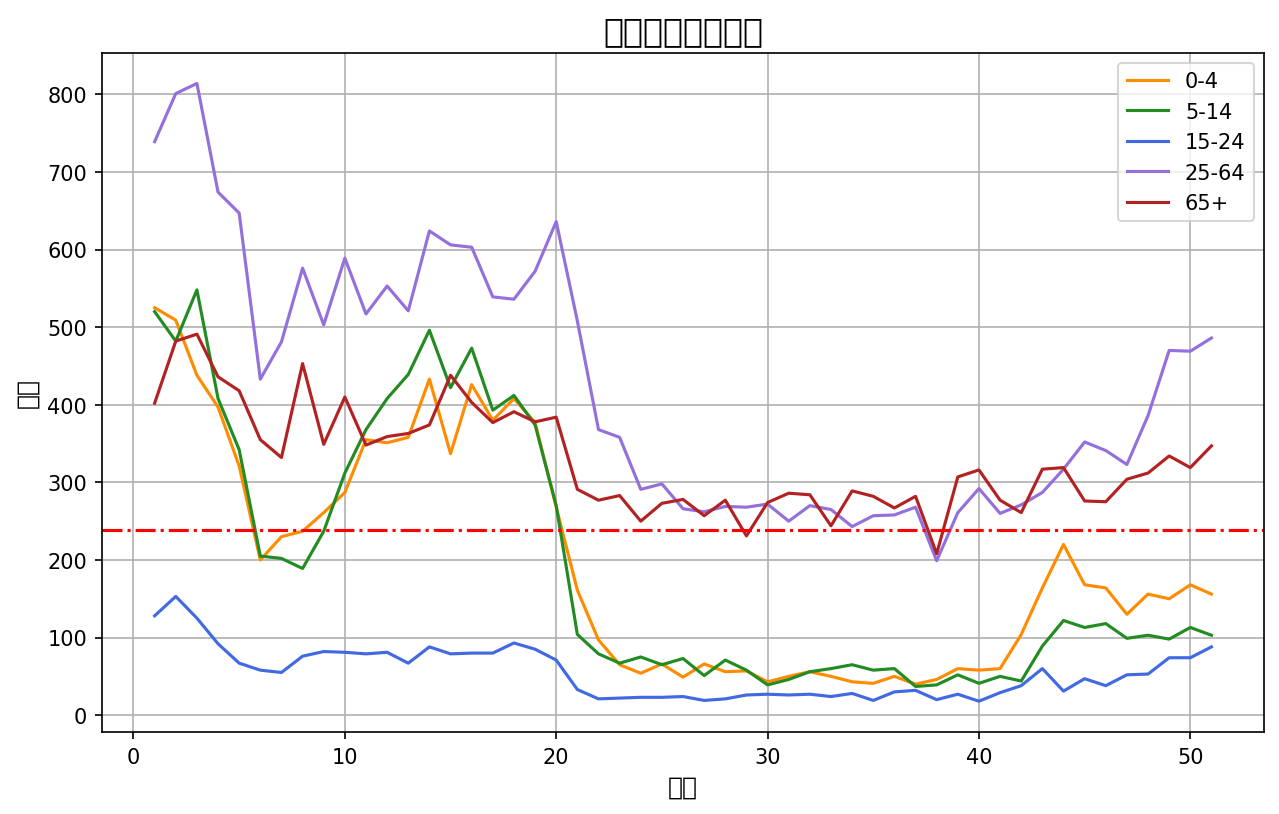

In [41]:
# plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # 設定字體
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False                # 用來正常顯示負號
plt.rcParams["figure.figsize"] = (10,6)
plt.figure(dpi=150)
plt.plot(age_0_4["case"], label = "0-4", color = "darkorange")
plt.plot(age_5_14["case"], label = "5-14", color = "forestgreen")
plt.plot(age_15_24["case"], label = "15-24", color = "royalblue")
plt.plot(age_25_64["case"], label = "25-64", color = "mediumpurple")
plt.plot(age_65["case"], label = "65+", color = "firebrick") #linestyle='-', marker = "o"
plt.axhline(y=df2["case"].mean(), color = 'red', linestyle='-.')
plt.xlabel("週次", fontsize=12)                # 設定 x 軸標題及粗體
plt.ylabel("人數", fontsize=12)  # 設定 y 軸標題及粗體
plt.title("流行性感冒趨勢圖", fontsize = 16, fontweight = "bold")   # 設定標題、文字大小、粗體及位置
plt.legend(loc='best')
plt.grid()
plt.show()

In [22]:
import matplotlib    
print(matplotlib.matplotlib_fname())

/Users/y/opt/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc


In [23]:
import matplotlib
matplotlib.get_cachedir()

'/Users/y/.matplotlib'